In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline
import warnings
import re
from datetime import datetime
import math

In [2]:
listing= pd.read_csv('C:/Users/prati/primeo/listing_for_modeling.csv')

In [3]:
listing.shape

(20244, 28)

In [4]:
for i in listing.columns: print(i)

id
host_id
host_name
host_is_superhost
host_identity_verified
latitude
longitude
neighbourhood_cleansed
price
property_type
room_type
accommodates
bedrooms
bathrooms
square_feet
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
review_scores_rating
availability_365
number_of_reviews
instant_bookable
cancellation_policy
require_guest_profile_picture
require_guest_phone_verification


In [5]:

listing['cancellation_policy'].value_counts()

cancellation_policy
strict_14_with_grace_period    7905
moderate                       7281
flexible                       4915
super_strict_60                 116
super_strict_30                  27
Name: count, dtype: int64

In [6]:
listing.isnull().sum()

id                                      0
host_id                                 0
host_name                               5
host_is_superhost                       5
host_identity_verified                  5
latitude                                0
longitude                               0
neighbourhood_cleansed                  0
price                                   0
property_type                           0
room_type                               0
accommodates                            0
bedrooms                               14
bathrooms                               7
square_feet                         19873
security_deposit                     6053
cleaning_fee                         3611
guests_included                         0
extra_people                            0
minimum_nights                          0
maximum_nights                          0
review_scores_rating                 2565
availability_365                        0
number_of_reviews                 

In [7]:

x = listing.isna().mean().round(4) * 100
d = pd.DataFrame(x[x > 60])
d.head()
l = list(d.index)
l

['square_feet']

In [8]:
listing.drop(columns=['square_feet'], inplace=True)

In [9]:
listing['price']=listing['price'].apply(lambda x: round(float(str(x).strip('$').replace(',',''))))

In [10]:
listing['price']

0         59
1         80
2        125
3        155
4         75
        ... 
20239    350
20240    200
20241     50
20242    124
20243    150
Name: price, Length: 20244, dtype: int64

In [11]:
listing['security_deposit']=listing['security_deposit'].apply(lambda x: float(str(x).strip('$').replace(',','')))

In [12]:
listing['security_deposit'].isna().sum()

6053

In [13]:
#Imputing Nulls for security deposit with mean value
listing['security_deposit']=listing['security_deposit'].fillna(listing['security_deposit'].mean())

In [14]:

listing['security_deposit'].isna().sum()

0

In [15]:
#converting cleaning fee which is in the format $xxx.xx into float
listing['cleaning_fee'] = listing['cleaning_fee'].apply(lambda x: float(str(x).strip('$').replace(',','')))

In [16]:
listing['cleaning_fee'].isna().sum()

3611

In [17]:
#Imputing Nulls for cleaning fee with mean value
listing['cleaning_fee']=listing['cleaning_fee'].fillna(listing['cleaning_fee'].mean())

In [18]:

listing['cleaning_fee'].isna().sum()

0

In [19]:

listing.isna().sum()

id                                     0
host_id                                0
host_name                              5
host_is_superhost                      5
host_identity_verified                 5
latitude                               0
longitude                              0
neighbourhood_cleansed                 0
price                                  0
property_type                          0
room_type                              0
accommodates                           0
bedrooms                              14
bathrooms                              7
security_deposit                       0
cleaning_fee                           0
guests_included                        0
extra_people                           0
minimum_nights                         0
maximum_nights                         0
review_scores_rating                2565
availability_365                       0
number_of_reviews                      0
instant_bookable                       0
cancellation_pol

In [20]:
listing['review_scores_rating']=listing['review_scores_rating'].fillna(listing['review_scores_rating'].mean())

In [21]:
listing.isna().sum()

id                                   0
host_id                              0
host_name                            5
host_is_superhost                    5
host_identity_verified               5
latitude                             0
longitude                            0
neighbourhood_cleansed               0
price                                0
property_type                        0
room_type                            0
accommodates                         0
bedrooms                            14
bathrooms                            7
security_deposit                     0
cleaning_fee                         0
guests_included                      0
extra_people                         0
minimum_nights                       0
maximum_nights                       0
review_scores_rating                 0
availability_365                     0
number_of_reviews                    0
instant_bookable                     0
cancellation_policy                  0
require_guest_profile_pic

In [22]:
listing_1 = listing.dropna(axis=0, subset=['host_name','host_is_superhost','host_identity_verified',
                                            'bedrooms', 'bathrooms'])

In [23]:
listing_1.isna().sum()

id                                  0
host_id                             0
host_name                           0
host_is_superhost                   0
host_identity_verified              0
latitude                            0
longitude                           0
neighbourhood_cleansed              0
price                               0
property_type                       0
room_type                           0
accommodates                        0
bedrooms                            0
bathrooms                           0
security_deposit                    0
cleaning_fee                        0
guests_included                     0
extra_people                        0
minimum_nights                      0
maximum_nights                      0
review_scores_rating                0
availability_365                    0
number_of_reviews                   0
instant_bookable                    0
cancellation_policy                 0
require_guest_profile_picture       0
require_gues

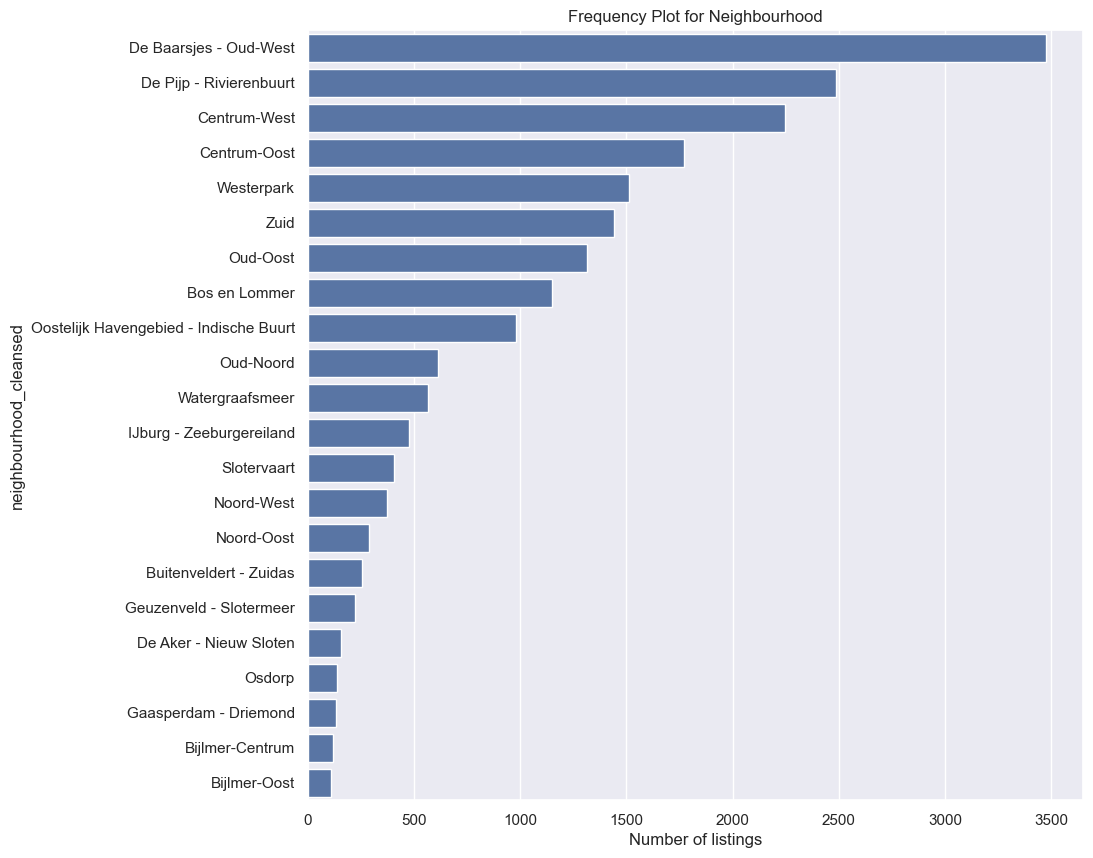

neighbourhood_cleansed
De Baarsjes - Oud-West                    3477
De Pijp - Rivierenbuurt                   2485
Centrum-West                              2248
Centrum-Oost                              1773
Westerpark                                1513
Zuid                                      1441
Oud-Oost                                  1314
Bos en Lommer                             1150
Oostelijk Havengebied - Indische Buurt     981
Oud-Noord                                  611
Watergraafsmeer                            566
IJburg - Zeeburgereiland                   477
Slotervaart                                405
Noord-West                                 371
Noord-Oost                                 286
Buitenveldert - Zuidas                     253
Geuzenveld - Slotermeer                    221
De Aker - Nieuw Sloten                     154
Osdorp                                     138
Gaasperdam - Driemond                      132
Bijlmer-Centrum                      

In [24]:
fig1 = plt.figure(figsize=(10,10))
sns.set(style='darkgrid')
sns.countplot(y='neighbourhood_cleansed', data = listing_1, order = listing_1['neighbourhood_cleansed'].value_counts().index)
plt.ylabel('neighbourhood_cleansed')
plt.xlabel('Number of listings')
plt.title('Frequency Plot for Neighbourhood')
plt.show()
listing_1['neighbourhood_cleansed'].value_counts()

Text(0.5, 1.0, 'Distribution of listings in different Neighbourhood')

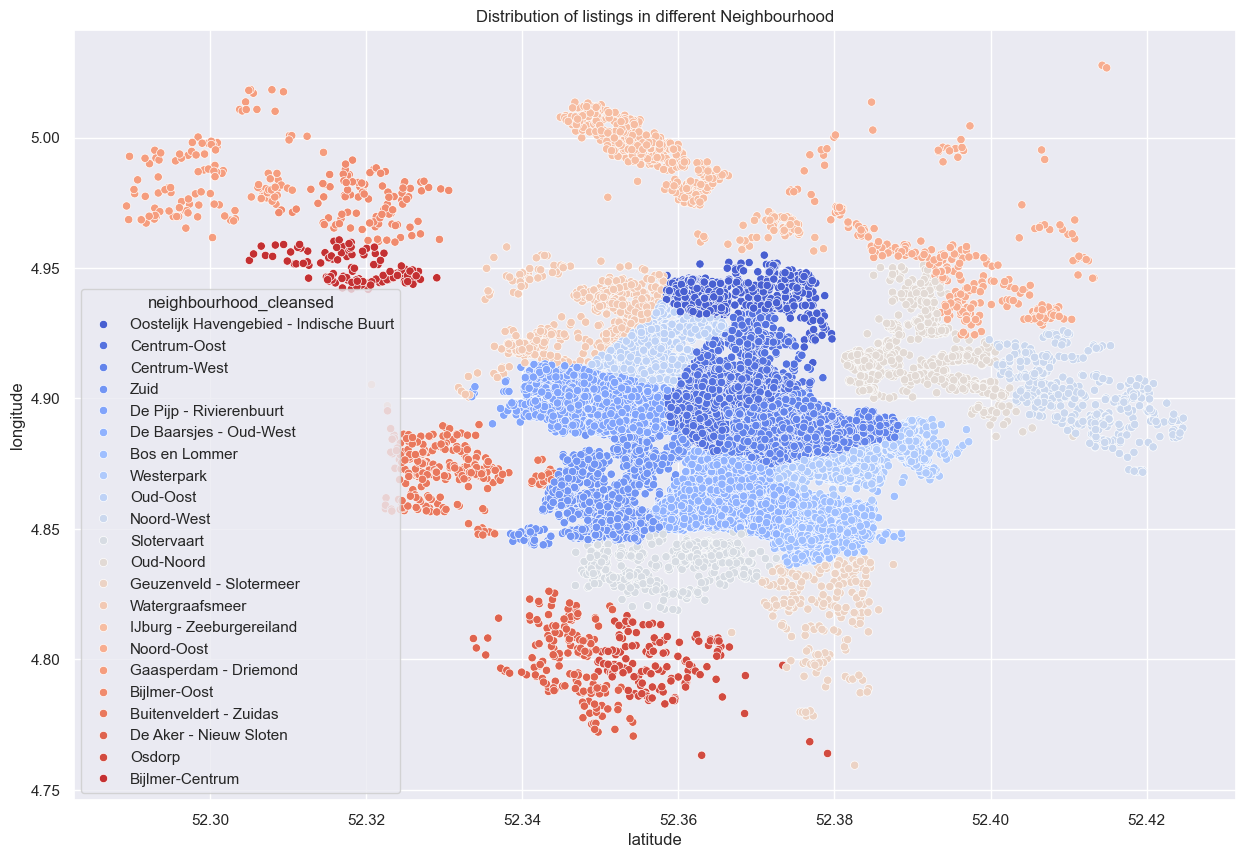

In [25]:
plt.figure(figsize=(15,10))
sns.scatterplot(y='longitude',x='latitude',hue='neighbourhood_cleansed',palette="coolwarm",data = listing_1)
plt.title('Distribution of listings in different Neighbourhood')

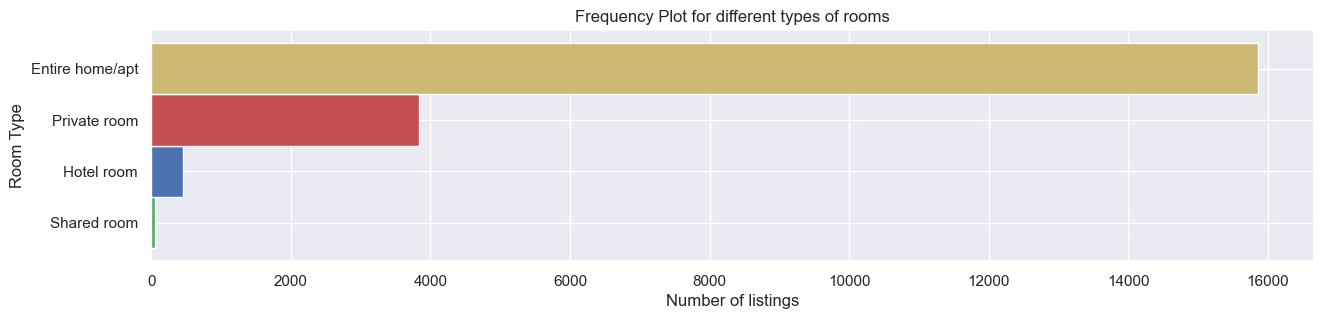

room_type
Entire home/apt    15862
Private room        3843
Hotel room           460
Shared room           53
Name: count, dtype: int64

In [26]:
#Room types
freq = listing_1['room_type']. value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(15, 3), width=1, color = ["g","b","r","y"])
plt.ylabel('Room Type')
plt.xlabel('Number of listings')
plt.title('Frequency Plot for different types of rooms')
plt.show()
listing_1['room_type'].value_counts()

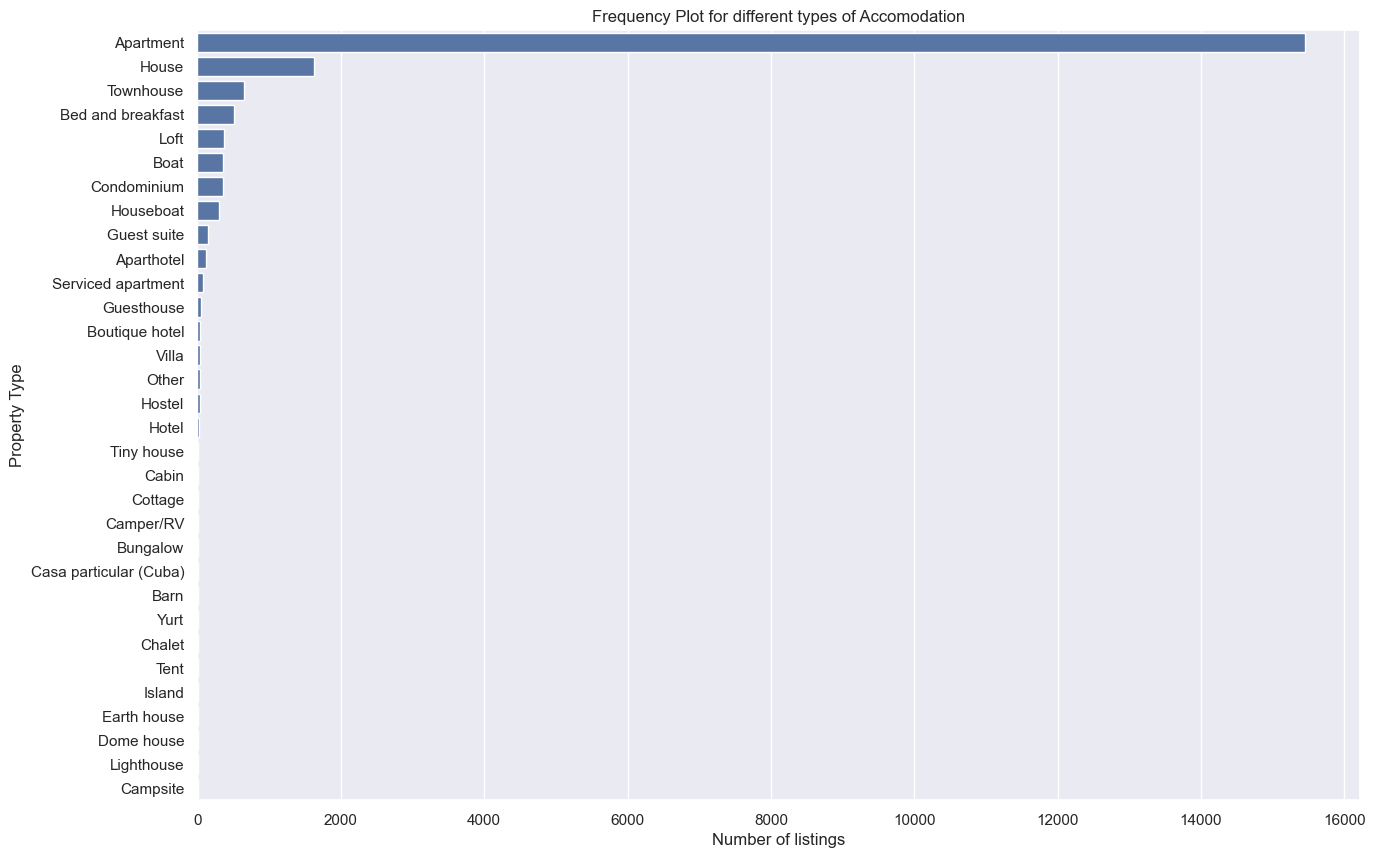

property_type
Apartment                 15446
House                      1621
Townhouse                   650
Bed and breakfast           508
Loft                        376
Boat                        361
Condominium                 359
Houseboat                   295
Guest suite                 142
Aparthotel                  115
Serviced apartment           74
Guesthouse                   48
Boutique hotel               39
Villa                        37
Other                        36
Hostel                       29
Hotel                        22
Tiny house                   12
Cabin                        12
Cottage                      11
Camper/RV                     5
Bungalow                      4
Casa particular (Cuba)        3
Barn                          3
Yurt                          2
Chalet                        2
Tent                          1
Island                        1
Earth house                   1
Dome house                    1
Lighthouse                

In [27]:
#property types
fig2 = plt.figure(figsize=(15,10))
sns.set(style='darkgrid')
sns.countplot(y='property_type', data = listing_1, order = listing_1['property_type'].value_counts().index)
plt.ylabel('Property Type')
plt.xlabel('Number of listings')
plt.title('Frequency Plot for different types of Accomodation')
plt.show()
listing_1['property_type'].value_counts()

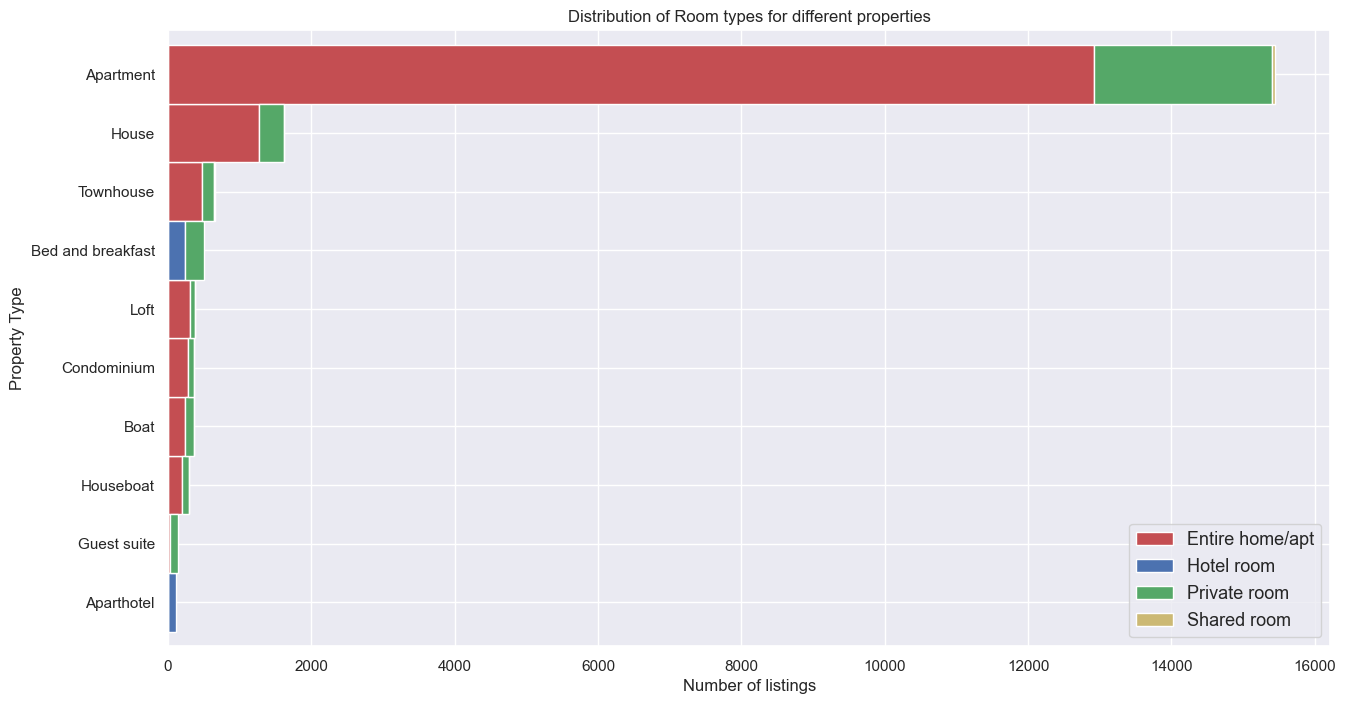

In [28]:
prop = listing_1.groupby(['property_type','room_type']).room_type.count()
prop = prop.unstack()
prop['total'] = prop.iloc[:,0:3].sum(axis = 1)
prop = prop.sort_values(by=['total'])
prop = prop[prop['total']>=100]
prop = prop.drop(columns=['total'])

prop.plot(kind='barh',stacked=True, color = ["r","b","g","y"],
              linewidth = 1, grid=True, figsize=(15,8), width=1)
plt.title('Distribution of Room types for different properties')
plt.xlabel('Number of listings')
plt.ylabel('Property Type')
plt.legend(loc = 4,prop = {"size" : 13})
plt.rc('ytick', labelsize=13)
plt.show()

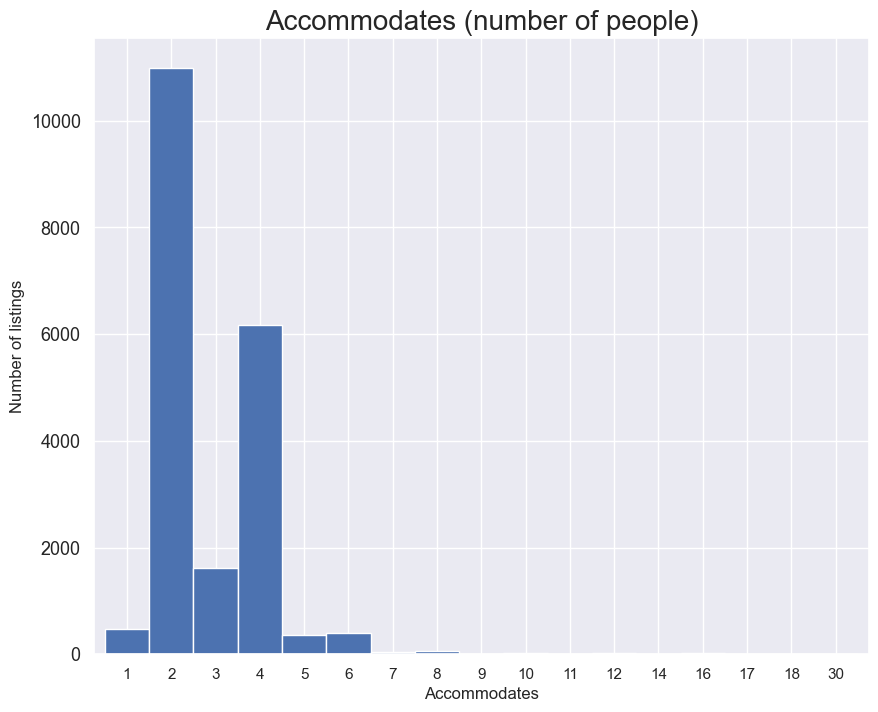

In [29]:
#Accomodates number of people
feq=listing_1['accommodates'].value_counts().sort_index()
feq.plot.bar(figsize=(10, 8), width=1, rot=0)
plt.title("Accommodates (number of people)", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('Accommodates', fontsize=12)
plt.show()

C:\Users\prati\AppData\Local\Temp\ipykernel_13384\283850062.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(listing_1.availability_365, kde=False)


Text(0, 0.5, 'Frequency')

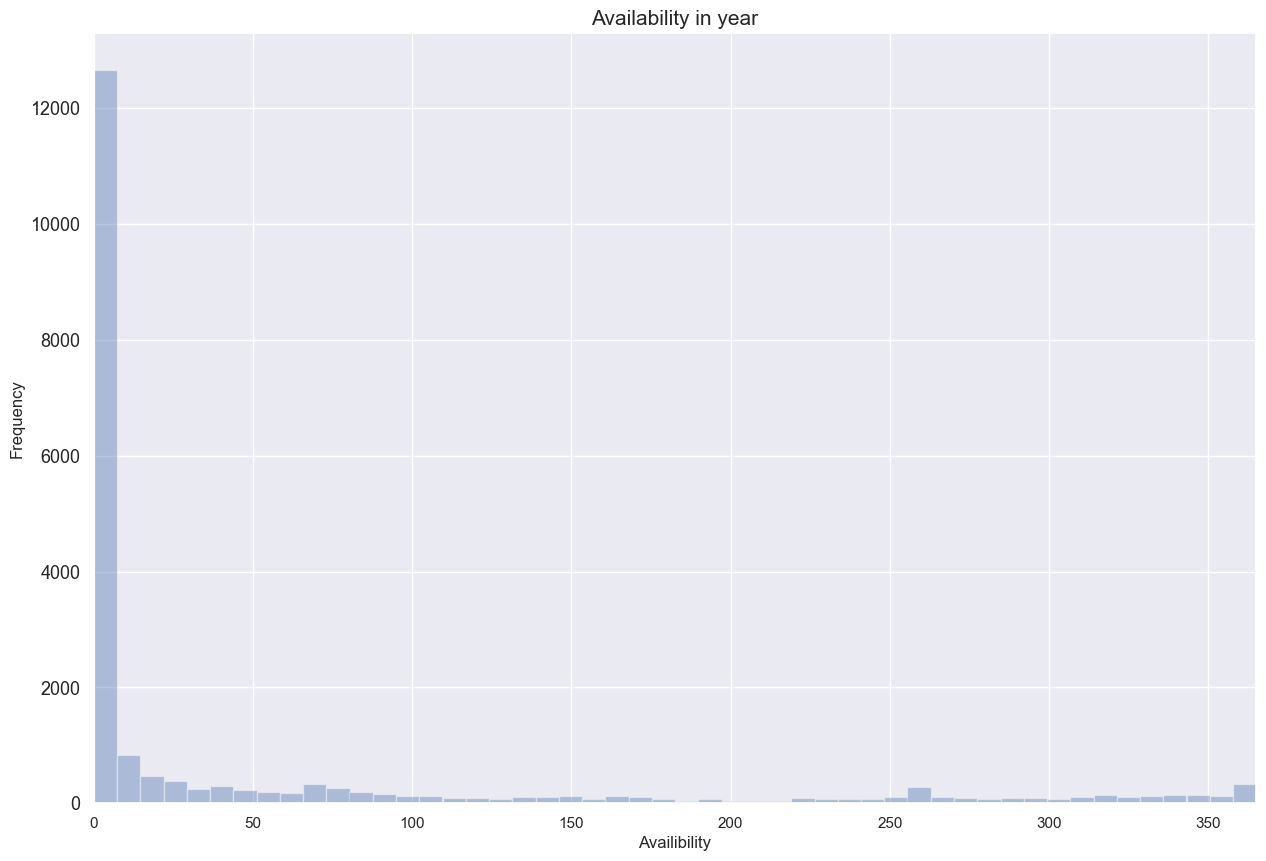

In [30]:

#Availability in a year
plt.figure(figsize=(15,10))
sns.distplot(listing_1.availability_365, kde=False)
plt.xlim(0,365)
plt.title('Availability in year', fontsize=15)
plt.xlabel('Availibility')
plt.ylabel("Frequency")

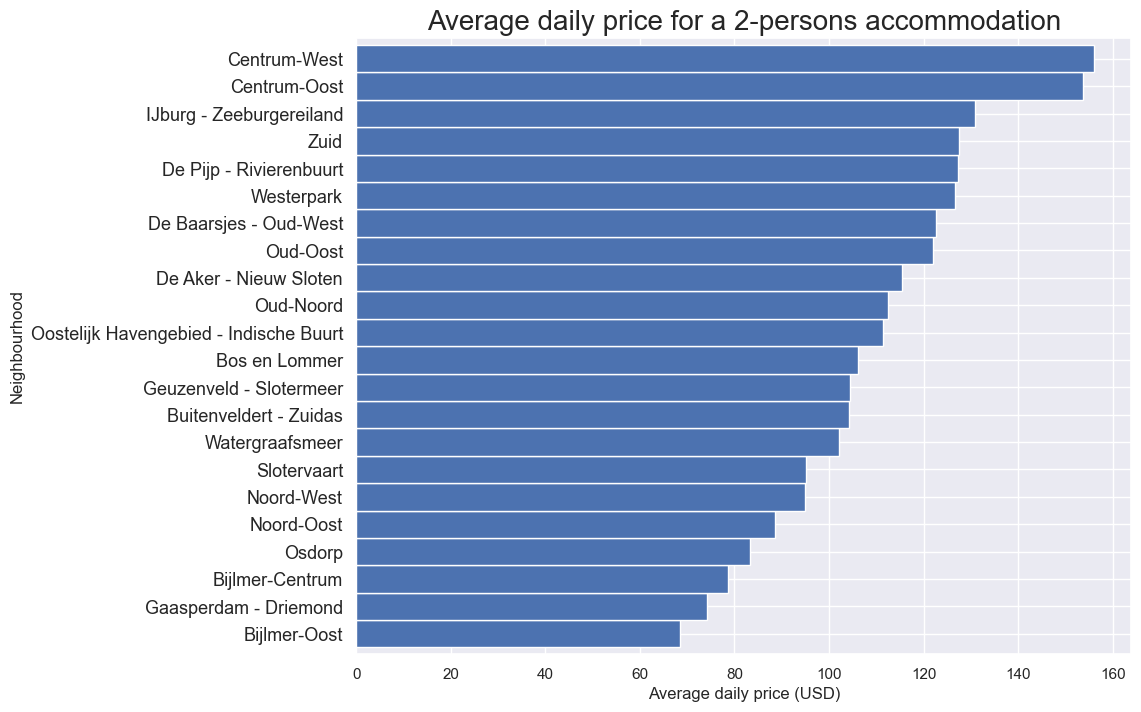

In [31]:
#Prices in Amsterdam Neighbourhoods
feq = listing_1[listing_1['accommodates']==2]
feq = feq.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 8), color='b', width=1)
plt.title("Average daily price for a 2-persons accommodation", fontsize=20)
plt.xlabel('Average daily price (USD)', fontsize=12)
plt.ylabel("Neighbourhood")
plt.show()


Text(0, 0.5, '')

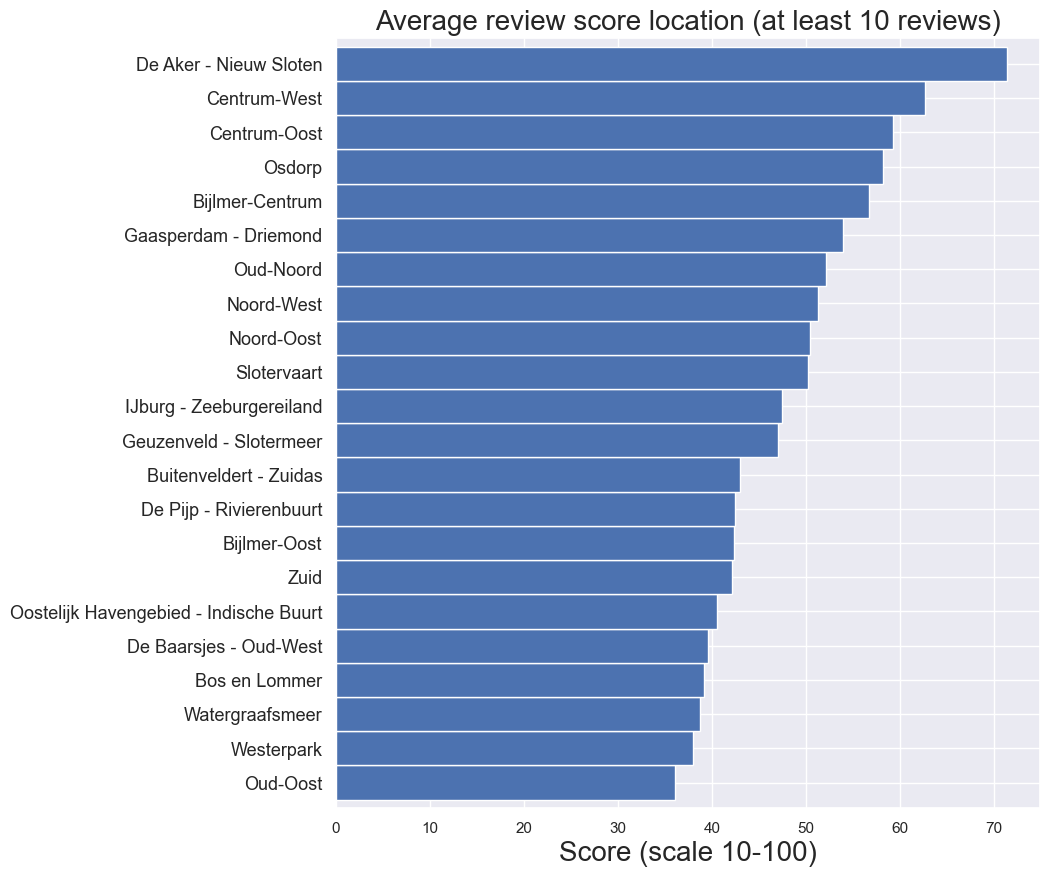

In [32]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
feq = listing_1[listing_1['number_of_reviews']>=10]
feq1 = feq.groupby('neighbourhood_cleansed')['number_of_reviews'].mean().sort_values(ascending=True)
ax1=feq1.plot.barh(color='b', width=1)
plt.title("Average review score location (at least 10 reviews)", fontsize=20)
plt.xlabel('Score (scale 10-100)', fontsize=20)
plt.ylabel("")

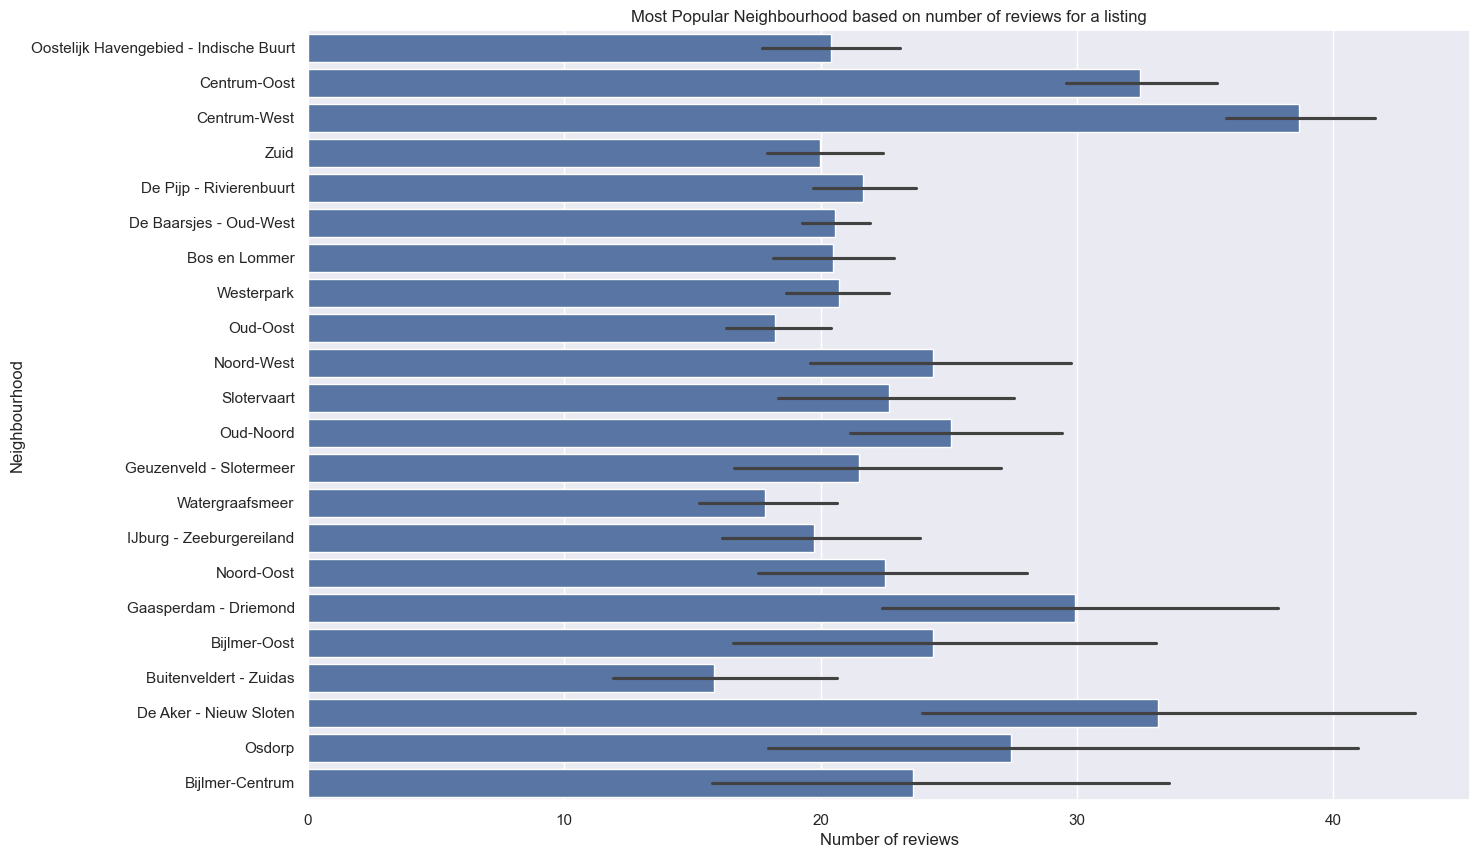

In [33]:
fig4 = plt.figure(figsize=(15,10))
sns.set(style='darkgrid')
sns.barplot(y='neighbourhood_cleansed', x = 'number_of_reviews',data = listing_1)
plt.ylabel('Neighbourhood')
plt.xlabel('Number of reviews')
plt.title('Most Popular Neighbourhood based on number of reviews for a listing')
plt.show()

In [34]:
centrumwest = listing_1[listing_1['neighbourhood_cleansed']=='Centrum-West']
centrumwest.head()

,id,host_id,host_name,host_is_superhost,host_identity_verified,latitude,longitude,neighbourhood_cleansed,price,property_type,...,extra_people,minimum_nights,maximum_nights,review_scores_rating,availability_365,number_of_reviews,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
2,25428,56142,Joan,f,f,52.37297,4.88339,Centrum-West,125,Apartment,...,$10.00,14,60,100.0,58,3,f,strict_14_with_grace_period,f,f
3,27886,97647,Flip,t,t,52.38673,4.89208,Centrum-West,155,Houseboat,...,$0.00,2,730,99.0,264,200,t,strict_14_with_grace_period,f,f
4,28871,124245,Edwin,t,t,52.36719,4.89092,Centrum-West,75,Apartment,...,$0.00,2,1825,97.0,123,295,f,moderate,f,f
5,29051,124245,Edwin,t,t,52.36773,4.89151,Centrum-West,55,Apartment,...,$0.00,2,730,95.0,155,446,f,moderate,f,f
7,42970,187580,Micha,t,f,52.36781,4.89001,Centrum-West,159,Bed and breakfast,...,$0.00,3,1100,98.0,47,460,t,strict_14_with_grace_period,f,t


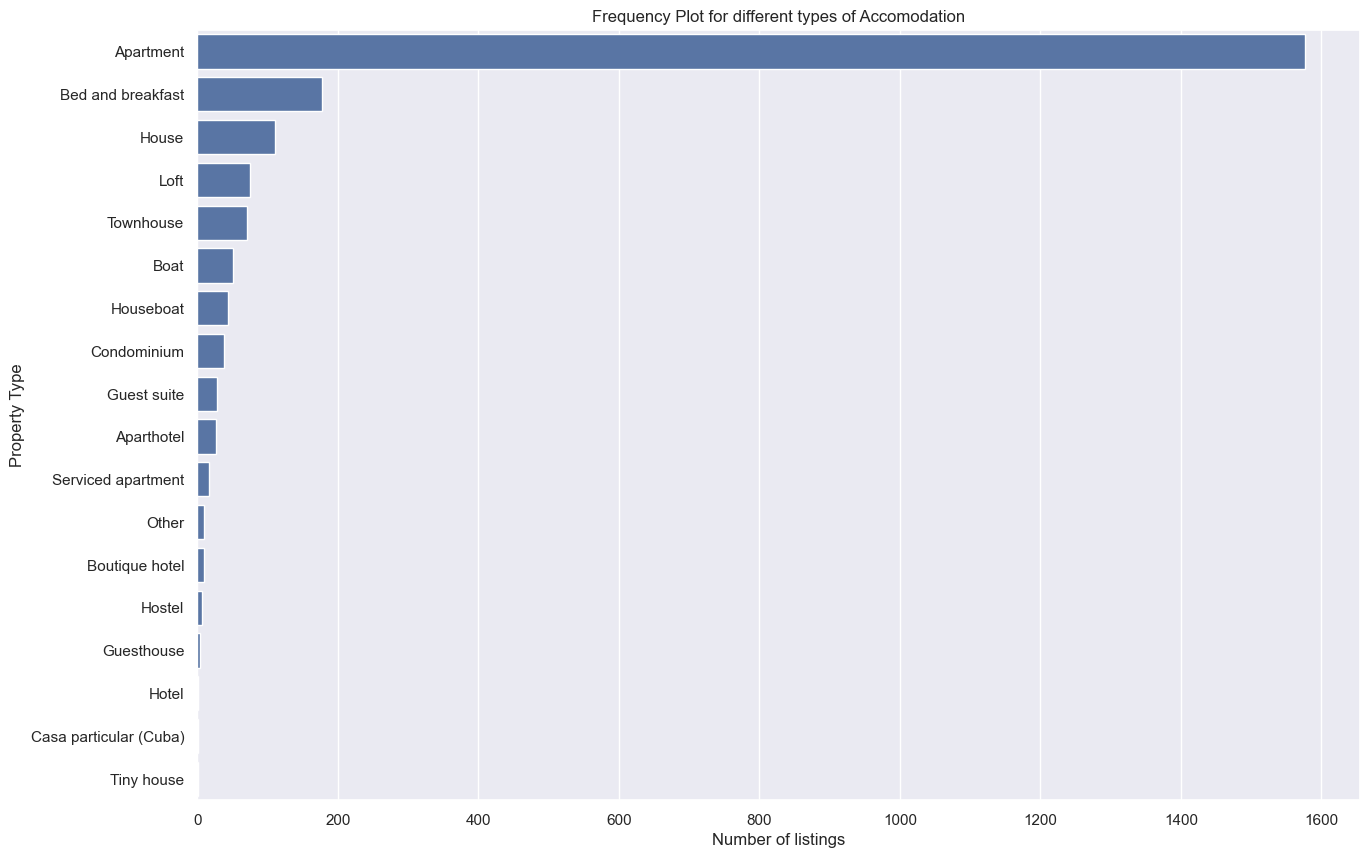

property_type
Apartment                 1576
Bed and breakfast          178
House                      110
Loft                        75
Townhouse                   70
Boat                        51
Houseboat                   44
Condominium                 38
Guest suite                 28
Aparthotel                  27
Serviced apartment          17
Other                       10
Boutique hotel              10
Hostel                       7
Guesthouse                   4
Hotel                        1
Casa particular (Cuba)       1
Tiny house                   1
Name: count, dtype: int64

In [35]:
#Property Type
fig5 = plt.figure(figsize=(15,10))
sns.set(style='darkgrid')
sns.countplot(y='property_type', data = centrumwest, order = centrumwest['property_type'].value_counts().index)
plt.ylabel('Property Type')
plt.xlabel('Number of listings')
plt.title('Frequency Plot for different types of Accomodation')
plt.show()
centrumwest['property_type'].value_counts()

In [36]:

#Selecting apartment as property
centrumwest = centrumwest[centrumwest['property_type']=='Apartment']
centrumwest.head()

,id,host_id,host_name,host_is_superhost,host_identity_verified,latitude,longitude,neighbourhood_cleansed,price,property_type,...,extra_people,minimum_nights,maximum_nights,review_scores_rating,availability_365,number_of_reviews,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
2,25428,56142,Joan,f,f,52.37297,4.88339,Centrum-West,125,Apartment,...,$10.00,14,60,100.0,58,3,f,strict_14_with_grace_period,f,f
4,28871,124245,Edwin,t,t,52.36719,4.89092,Centrum-West,75,Apartment,...,$0.00,2,1825,97.0,123,295,f,moderate,f,f
5,29051,124245,Edwin,t,t,52.36773,4.89151,Centrum-West,55,Apartment,...,$0.00,2,730,95.0,155,446,f,moderate,f,f
8,43109,188098,Aukje,f,t,52.37537,4.88932,Centrum-West,210,Apartment,...,$60.00,13,14,97.0,0,690,f,moderate,f,f
13,48076,219080,Franklin,t,f,52.38042,4.89453,Centrum-West,350,Apartment,...,$50.00,6,30,97.0,75,190,f,strict_14_with_grace_period,f,t


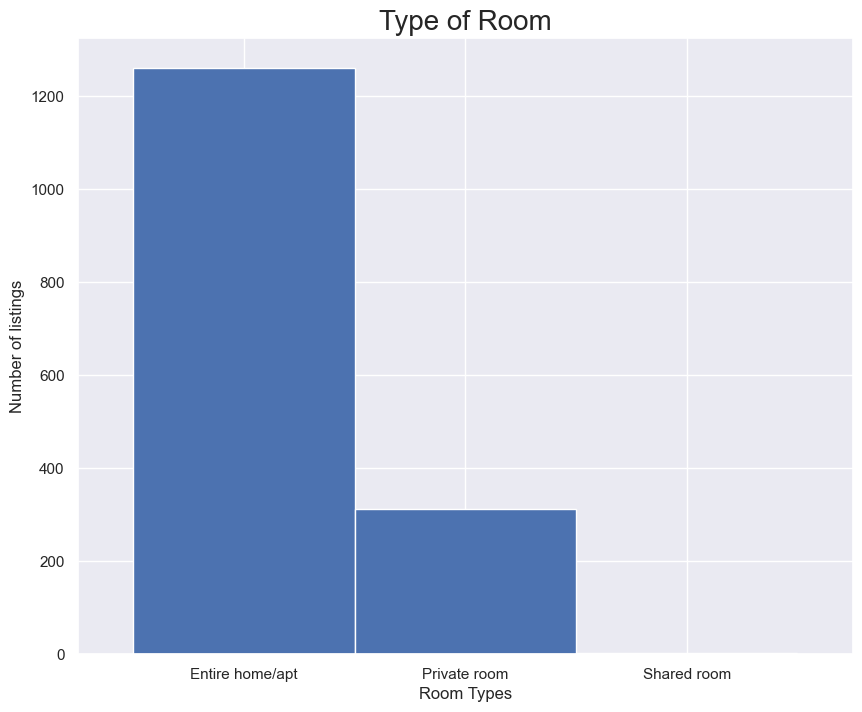

In [37]:

#Room type
room=centrumwest['room_type'].value_counts().sort_index()
room.plot.bar(figsize=(10, 8), width=1, rot=0)
plt.title("Type of Room", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('Room Types', fontsize=12)
plt.show()

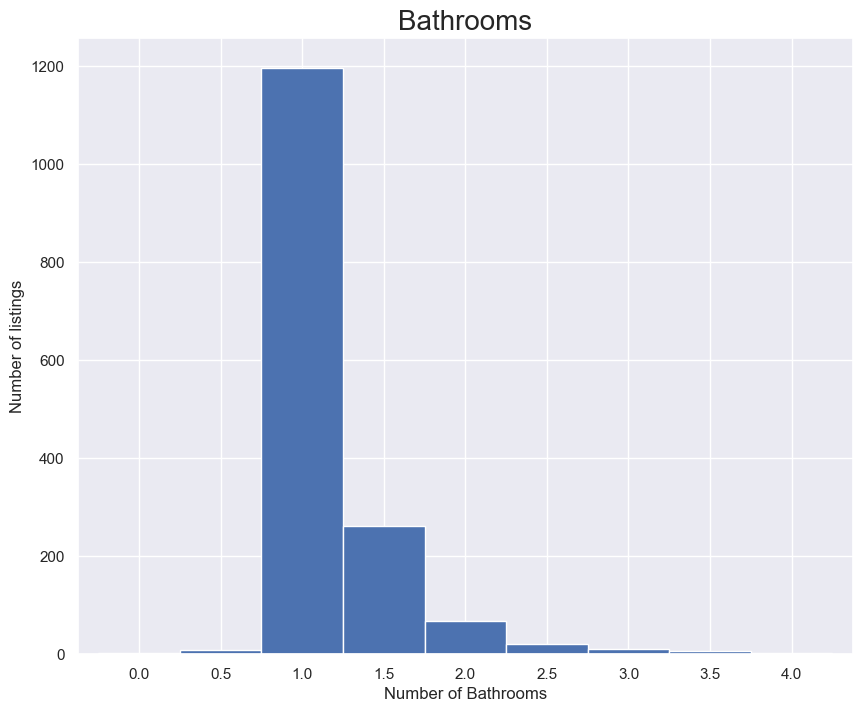

In [38]:

#Number of bathrooms
bathrooms=centrumwest['bathrooms'].value_counts().sort_index()
bathrooms.plot.bar(figsize=(10, 8), width=1, rot=0)
plt.title("Bathrooms", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('Number of Bathrooms', fontsize=12)
plt.show()

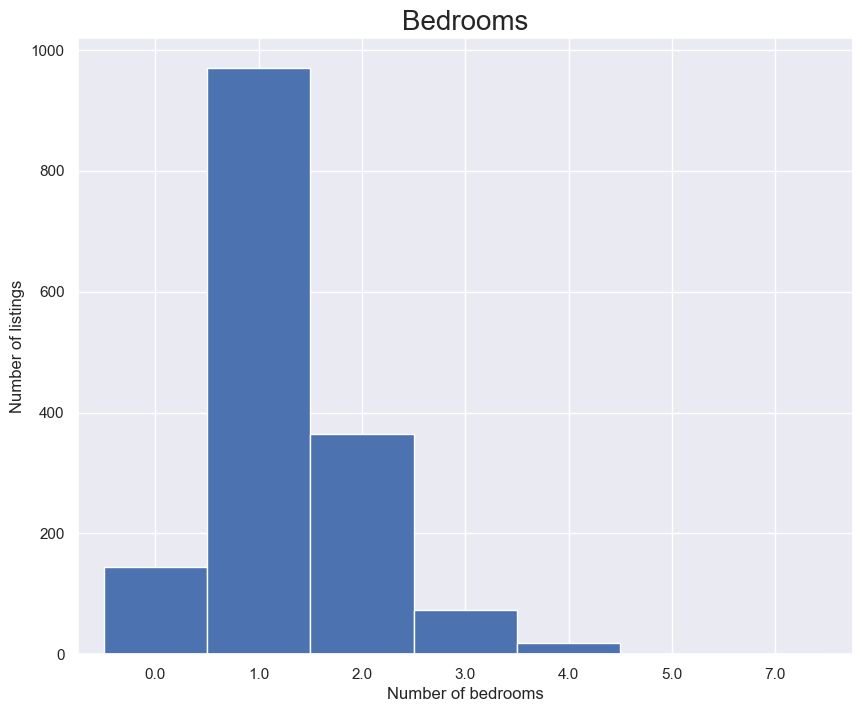

In [39]:

#Number of bedrooms
bedrooms=centrumwest['bedrooms'].value_counts().sort_index()
bedrooms.plot.bar(figsize=(10, 8), width=1, rot=0)
plt.title("Bedrooms", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('Number of bedrooms', fontsize=12)
plt.show()

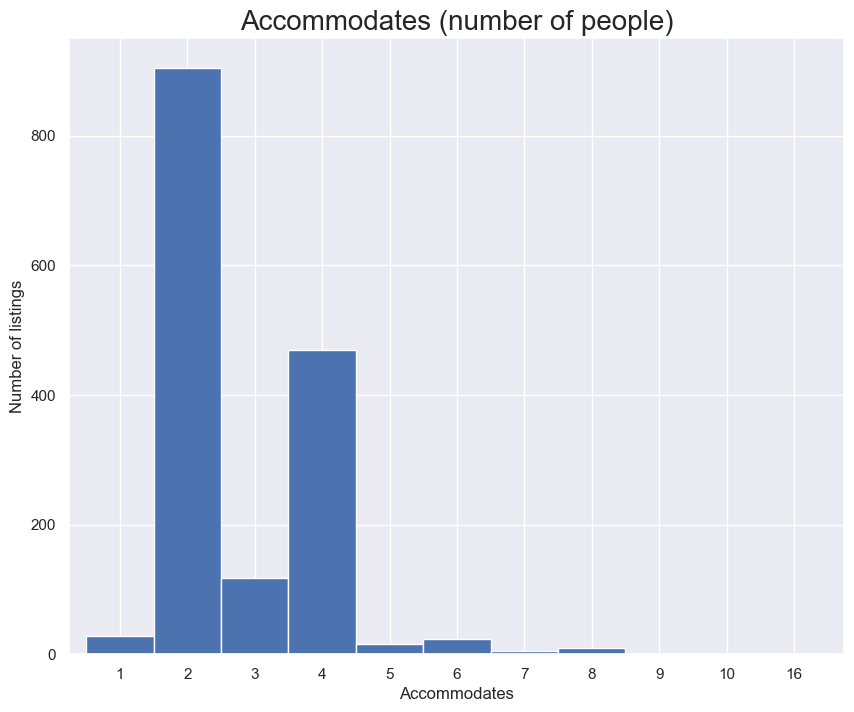

In [40]:

#Accomodates number of people
accomodates=centrumwest['accommodates'].value_counts().sort_index()
accomodates.plot.bar(figsize=(10, 8), width=1, rot=0)
plt.title("Accommodates (number of people)", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('Accommodates', fontsize=12)
plt.show()

In [41]:

centrumwest = centrumwest[centrumwest['guests_included']==1]
centrumwest.head()

,id,host_id,host_name,host_is_superhost,host_identity_verified,latitude,longitude,neighbourhood_cleansed,price,property_type,...,extra_people,minimum_nights,maximum_nights,review_scores_rating,availability_365,number_of_reviews,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
4,28871,124245,Edwin,t,t,52.36719,4.89092,Centrum-West,75,Apartment,...,$0.00,2,1825,97.0,123,295,f,moderate,f,f
5,29051,124245,Edwin,t,t,52.36773,4.89151,Centrum-West,55,Apartment,...,$0.00,2,730,95.0,155,446,f,moderate,f,f
30,56879,270282,Linda & Theo,f,f,52.38453,4.89255,Centrum-West,112,Apartment,...,$10.00,28,28,100.0,244,1,t,strict_14_with_grace_period,f,t
49,83498,124245,Edwin,t,t,52.36723,4.89124,Centrum-West,45,Apartment,...,$0.00,2,365,94.0,146,479,f,moderate,f,f
86,198307,967796,Marie-Katrien,f,f,52.38393,4.89237,Centrum-West,129,Apartment,...,$0.00,3,1125,99.0,0,38,f,strict_14_with_grace_period,f,f


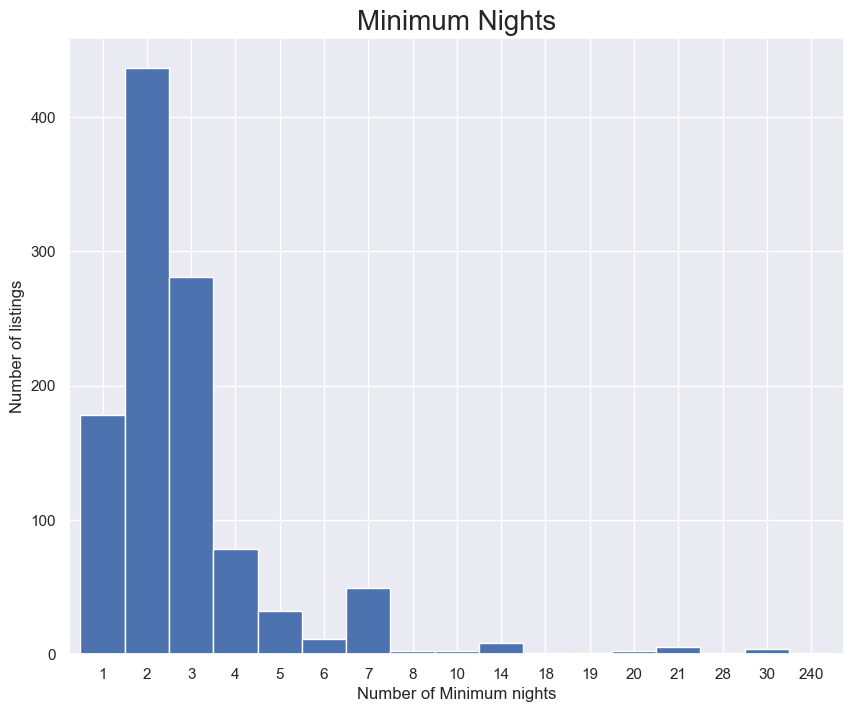

In [42]:

#Number of min nights
min_nights=centrumwest['minimum_nights'].value_counts().sort_index()
min_nights.plot.bar(figsize=(10, 8), width=1, rot=0)
plt.title("Minimum Nights", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('Number of Minimum nights', fontsize=12)
plt.show()

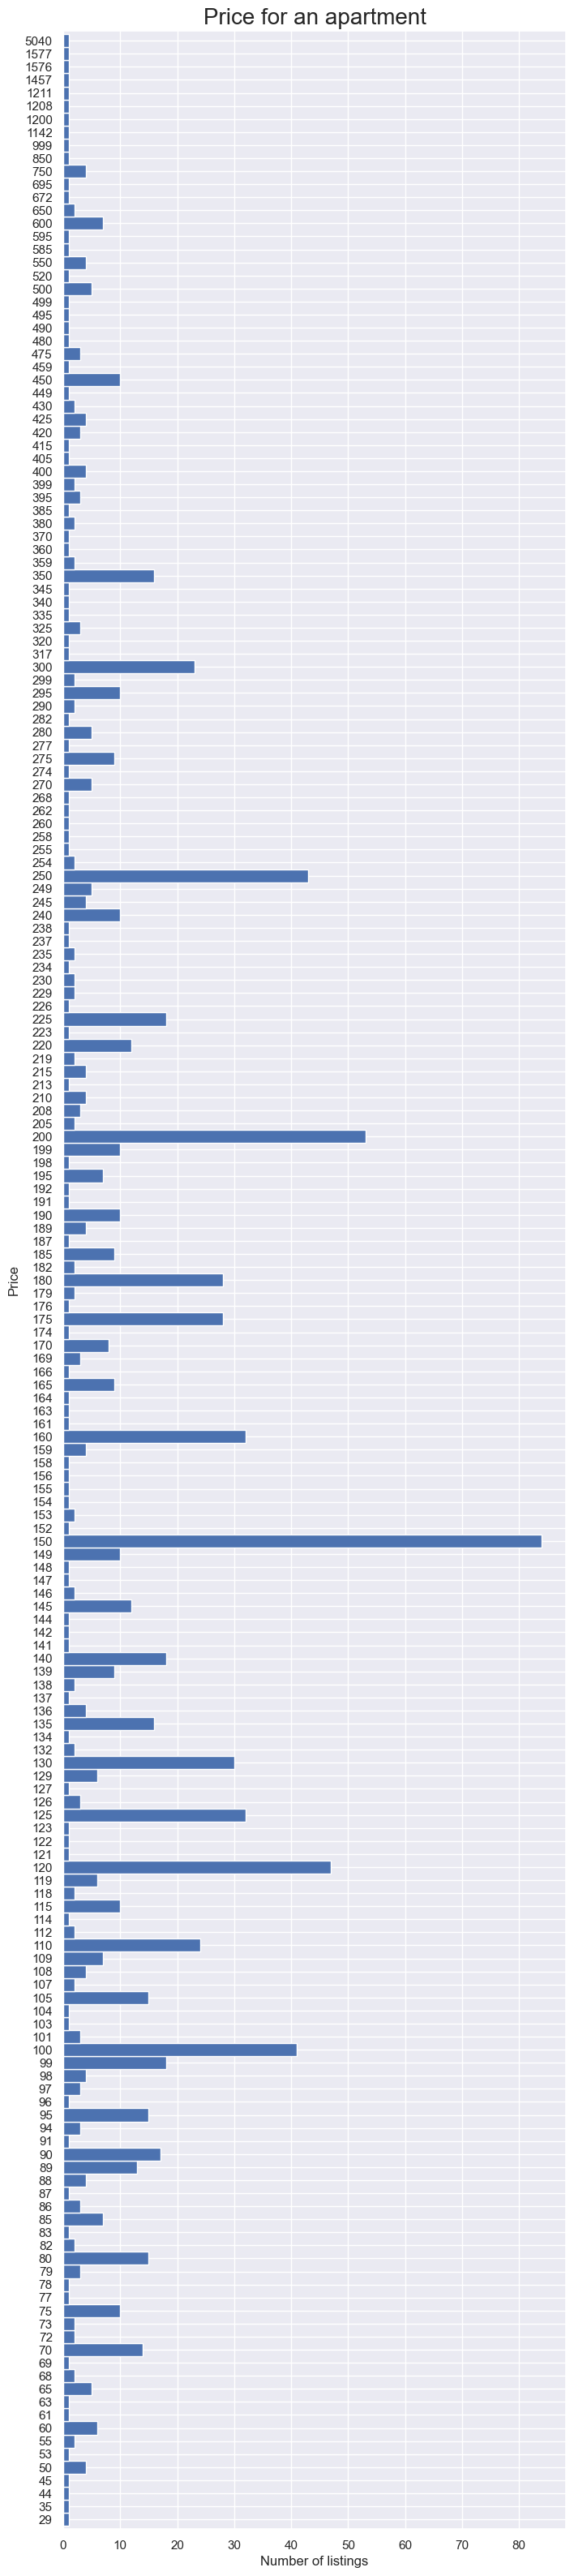

In [43]:

#Price
price=centrumwest['price'].value_counts().sort_index()
price.plot.barh(figsize=(8, 40), width=1, rot=0)
plt.title("Price for an apartment", fontsize=20)
plt.ylabel('Price', fontsize=12)
plt.xlabel('Number of listings', fontsize=12)
plt.show()